## Web scrapping using python

#### References
1. [Practical Introduction to Web Scraping in Python](https://realpython.com/python-web-scraping-practical-introduction/)
2. [Web Scraping using Python](https://www.datacamp.com/community/tutorials/web-scraping-using-python)

In [ ]:
# $ python3 -m venv venv
# $ . ./venv/bin/activate

In [1]:
#Better
!pip install requests BeautifulSoup4 fire

  Created wheel for fire: filename=fire-0.3.1-py2.py3-none-any.whl size=111010 sha256=aedbdaf45bf5c73f48c13fc579c2cc6eba14f396b50f1d5f190c615190a7a328
  Stored in directory: c:\users\jeannette\appdata\local\pip\cache\wheels\95\38\e1\8b62337a8ecf5728bdc1017e828f253f7a9cf25db999861bec
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=680b661b797c9bea096d3b40b5accdf6ca43f6b44fe6b8370edbee61f91272b9
  Stored in directory: c:\users\jeannette\appdata\local\pip\cache\wheels\3f\e3\ec\8a8336ff196023622fbcb36de0c5a5c218cbb24111d1d4c7f2
Successfully built fire termcolor


In [2]:
from requests import get
from requests.exceptions import RequestException
from contextlib import closing
from bs4 import BeautifulSoup
import pandas as pd
import os, sys
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
from tweepy import OAuthHandler
from tweepy import API
from tweepy import Cursor
from datetime import datetime, date, time, timedelta
from collections import Counter
import sys
import numpy as np

%matplotlib inline

import fire

In [3]:
#%%writefile ../pyscrap_url.py

def simple_get(url):
    """
    Attempts to get the content at `url` by making an HTTP GET request.
    If the content-type of response is some kind of HTML/XML, return the
    text content, otherwise return None.
    """
    try:
        with closing(get(url, stream=True)) as resp:
            if is_good_response(resp):
                return resp.content  #.encode(BeautifulSoup.original_encoding)
            else:
                return None

    except RequestException as e:
        log_error('Error during requests to {0} : {1}'.format(url, str(e)))
        return None


def is_good_response(resp):
    """
    Returns True if the response seems to be HTML, False otherwise.
    """
    content_type = resp.headers['Content-Type'].lower()
    return (resp.status_code == 200 
            and content_type is not None 
            and content_type.find('html') > -1)


def log_error(e):
    """
    It is always a good idea to log errors. 
    This function just prints them, but you can
    make it do anything.
    """
    print(e)
    
def get_elements(url, tag='',search={}, fname=None):
    """
    Downloads a page specified by the url parameter
    and returns a list of strings, one per tag element
    """
    if isinstance(url,str):
        response = simple_get(url)
    else:
        #if already it is a loaded html page
        response = url
    if response is not None:
        html = BeautifulSoup(response, 'html.parser')
        res = []
        if tag:    
            for li in html.select(tag):
                for name in li.text.split('\n'):
                    if len(name) > 0:
                        res.append(name.strip())
        if search:
            soup = html            
            r = ''
            if 'find' in search.keys():
                print('findaing',search['find'])
                soup = soup.find(**search['find'])
                r = soup
            if 'find_all' in search.keys():
                print('findaing all of',search['find_all'])
                r = soup.find_all(**search['find_all'])
            if r:
                for x in list(r):
                    if len(x) > 0:
                        res.extend(x)
        return res
    # Raise an exception if we failed to get any data from the url
    raise Exception('Error retrieving contents at {}'.format(url))    
    

    
if get_ipython().__class__.__name__ == '__main__':
    fire(get_elements)

In [4]:
res = get_elements('https://africafreak.com/100-most-influential-twitter-users-in-africa', tag = 'h2') 
data = res[90:100]
data1 = res[::-1] #reversing the top influentials
df = pd.DataFrame(data1)
df.head(10)

,0
0,11 Comments
1,You have successfully subscribed. Thank you!
2,Celebrate Wild Africa With Us!
3,Tweet about Africa?
4,Subscribe to the list
5,1. Trevor Noah (@Trevornoah)
6,2. Gareth Cliff (@GarethCliff)
7,3. Jacob G. Zuma (@SAPresident)
8,4. News24 (@News24)
9,5. Julius Sello Malema (@Julius_S_Malema)


In [5]:
url= 'https://www.atlanticcouncil.org/blogs/africasource/african-leaders-respond-to-coronavirus-on-twitter/#east-africa'
response = simple_get(url)


# Getting the top government official

In [24]:
res_gov = get_elements(response, tag='blockquote')
names = []
handles = []
for r in res_gov:
    split_data = r.split('— ',maxsplit=1)[1].rsplit('(',maxsplit=1)
    name = split_data[0].split(',')[0].strip()
    handle =  split_data[1].rsplit(')',maxsplit=1)[0]
    names.append(name)
    handles.append(handle)
    
# df_gov = pd.DataFrame({'Names': names, 'Handles': handles}) 
df_gov = pd.DataFrame(handles) 
df_gov.head(10).to_csv (r'C:\Users\jeannette\Desktop\top10_gov_influencers.csv', index = False, header=True)
df_gov.to_csv (r'C:\Users\jeannette\Desktop\top10_gov_influencers.csv', index = False, header=True)
df_gov1 = df_gov[0].str.split('.',expand = True)
df_gov2 = df_gov1[0].replace('@','', regex=True)
df_gov2
# df_gov2 = df_gov1[0].str.split('(',expand = True)
# df_gov2.head(10)

0     EswatiniGovern1
1          MalawiGovt
2         hagegeingob
3           FinanceSC
4        PresidencyZA
5           mohzambia
6         edmnangagwa
7          MinSantedj
8             hawelti
9     StateHouseKenya
10         PaulKagame
11         M_Farmaajo
12      SouthSudanGov
13      SudanPMHamdok
14     TZSpokesperson
15     KagutaMuseveni
16       angola_Mirex
17      willynyamitwe
18          Cherif_MZ
19     Presidence_RDC
20       PresidentABO
21    PresidenceBenin
22       rochkaborepf
23      PresidenciaCV
24     AOuattara_PRCI
25     Presidency_GMB
26         NAkufoAddo
27       President_GN
28           USEmbalo
29     PresidenceMali
30    CheikhGhazouani
31        IssoufouMhm
32            MBuhari
33         Macky_Sall
34       PresidentBio
35          MSPS_Togo
Name: 0, dtype: object

## Web scrapping using bash script
If the web site has a quite simple HTML, you can easily use curl to perform the request and then extract the needed values using bash commands grep, cut , sed, ..

This tutorial is adapted from [this](https://medium.com/@LiliSousa/web-scraping-with-bash-690e4ee7f98d) medium article

In [16]:
#twitter influencers data cleaning

df1 = df[0].str.split('.',expand = True)
df1.head(10)
df2 = df1[1].str.split('(',expand = True)
df2.head(10)
df3 = df2[1].str.split(')',expand = True)
df3.tail(20)
df4 = df3.dropna(axis=0, how='any')
df5 = df4[0].replace('@','', regex=True)

df5.to_csv (r'C:\Users\jeannette\Desktop\top10_influencers.csv', index = False, header=True)
df5.head(10)

5          Trevornoah
6         GarethCliff
8              News24
9     Julius_S_Malema
10         helenzille
11    mailandguardian
12                5FM
13         loyisogola
14        Computicket
15      MTVbaseAfrica
Name: 0, dtype: object

In [17]:
consumer_key = '6DiGOBXi1BqSNYQkXNLxcQUPY'
consumer_secret = 'kQHjfN7LEZQjHCgD447qAS95zpWN8xajCgf8W6pAt1RIPzMqBZ'
access_token = '855442991695224833-nDKgA31lMS1CKylDAJlOe4kEaVzidwg'
access_token_secret = 'oxDeKQ55OVx5TGdXnrDUGByKxqoGLTUBI8ygqt8AZqiDk'
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = API(auth)

In [39]:
Tweets = pd.DataFrame()
for target in df5:
    try:
#         print("Getting data for " + target)
        tweets = api.user_timeline(screen_name=target,count=10)
        user_details = api.get_user(target)
        tweet_list = [tweet for tweet in tweets]
        for tweet in tweet_list:
            text = tweet.text
            retweets=tweet.retweet_count
            entities = tweet.entities
            favorite = tweet.favorite_count
            text_df = pd.DataFrame(data=[target],columns = ['user'])
            text_df['tweet'] = np.array([text])
            text_df['number of retweets'] = np.array([retweets])
            text_df['number of likes'] = np.array([favorite])
            text_df['entities'] = np.array([entities])
            hashtags = tweet.entities['hashtags']
            if hashtags:
                ht = [ht['text'] for ht in hashtags]
                ht=' '.join( ht )
                text_df['hashtags'] = ht
            user_mentions = tweet.entities['user_mentions']
            if user_mentions:
                mentions = [user['screen_name'] for user in user_mentions]
                mentions=' '.join(mentions)
                text_df['mentions'] = mentions
            Tweets=pd.concat([Tweets,text_df],ignore_index=True)
            Tweets.to_csv('test3.csv')
    except tweepy.TweepError:
        pass 
Tweets.head()

,user,tweet,number of retweets,number of likes,entities,mentions,hashtags
0,Trevornoah,Oh my God! 😭 “Trepanoah” What an adorable litt...,2508,36956,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,NaN
1,Trevornoah,Actual video footage of me starting off the we...,2761,21073,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,NaN
2,Trevornoah,RT @KingBach: https://t.co/Sj2sVP7Gdt,93128,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",KingBach,NaN
3,Trevornoah,When white people take “being an ally” too far...,6029,43550,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,NaN
4,Trevornoah,Me at the restaurant after things return to no...,1659,14769,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,NaN


In [40]:
retweet_sort = Tweets.sort_values('number of retweets',ascending=False)
retweet_sort.head(10)

,user,tweet,number of retweets,number of likes,entities,mentions,hashtags
256,JendayiFrazer,RT @thejulianbass: if y’all can retweet this e...,556780,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",thejulianbass,NaN
653,forbeesta,RT @shariauna_: Oluwatoyin “Toyin” Salau\nRest...,179127,0,"{'hashtags': [{'text': 'JusticeForToyin', 'ind...",shariauna_,JusticeForToyin
9,Trevornoah,RT @Sensational_Dre: So a person with a felony...,102299,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Sensational_Dre,NaN
2,Trevornoah,RT @KingBach: https://t.co/Sj2sVP7Gdt,93128,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",KingBach,NaN
7,Trevornoah,RT @SawyerHackett: Never would have thought a ...,56937,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",SawyerHackett,NaN
347,MbuyiseniNdlozi,RT @mattmurphmd: I work in bars and restaurant...,8439,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",mattmurphmd,NaN
37,Julius_S_Malema,"RT @seungminkim: His final public appearance, ...",7734,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",seungminkim repjohnlewis,NaN
735,malonebarry,RT @BreeNewsome: Folks have convinced themselv...,6420,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",BreeNewsome,NaN
3,Trevornoah,When white people take “being an ally” too far...,6029,43550,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,NaN
6,Trevornoah,There are people fighting to walk around a sup...,4996,34354,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,NaN


In [49]:
text_df['hashtags'].unique().tolist()

['PLA IndianArmy']

In [34]:
Tweets = pd.DataFrame()
for target in df_gov:
    try:
#         print("Getting data for " + target)
        tweets = api.user_timeline(screen_name=target,count=10,include_rts=False)
        user_details = api.get_user(target)
        tweet_list = [tweet for tweet in tweets]
        for tweet in tweet_list:
            text = tweet.text
            retweets=tweet.retweet_count
            entities = tweet.entities
            favorite = tweet.favorite_count
            text_df = pd.DataFrame(data=[target],columns = ['user'])
            text_df['tweet'] = np.array([text])
            text_df['number of retweets'] = np.array([retweets])
            text_df['number of likes'] = np.array([favorite])
            text_df['entities'] = np.array([entities])
            hashtags = tweet.entities['hashtags']
            
            if hashtags:
                
                ht = [ht['text'] for ht in hashtags]
                ht=' '.join( ht )
                text_df['hashtags'] = ht
                
                
                
            user_mentions = tweet.entities['user_mentions']
            if user_mentions:
                mentions = [user['screen_name'] for user in user_mentions]
                mentions=' '.join(mentions)
                text_df['mentions'] = mentions
            Tweets=pd.concat([Tweets,text_df],ignore_index=True)
            Tweets.to_csv('leadertw.csv')
    except tweepy.TweepError:
        pass
Tweets.head()

""


In [14]:
retweet_sorts = Tweets_gov.sort_values('number of retweets',ascending=False)
retweet_sorts.head(10)

,user,tweet,number of retweets,number of likes,entities,hashtags,mentions
2268,NAkufoAddo,#StayAtHome https://t.co/bKPQUfLDDr,29847,75936,"{'hashtags': [{'text': 'StayAtHome', 'indices'...",StayAtHome,NaN
2249,NAkufoAddo,#GeorgeFloyd #JusticeForGeorgeFloyd https://t....,13877,47764,"{'hashtags': [{'text': 'GeorgeFloyd', 'indices...",GeorgeFloyd JusticeForGeorgeFloyd,NaN
890,PaulKagame,I joined @WHO #SafeHands challenge. Handwashin...,5793,15046,"{'hashtags': [{'text': 'SafeHands', 'indices':...",SafeHands COVID19,WHO
523,edmnangagwa,Thank you to our dear friends in India for the...,4410,16303,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,NaN
2270,NAkufoAddo,Let us pray to God to protect our nation and s...,4259,16947,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,NaN
2623,MBuhari,I am determined to get to the root of the prob...,3168,15754,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,NaN
2266,NAkufoAddo,#HumanityOverEconomy #StayAtHome https://t.co/...,3101,12662,"{'hashtags': [{'text': 'HumanityOverEconomy', ...",HumanityOverEconomy StayAtHome,NaN
2267,NAkufoAddo,#StayAtHome\n#SpreadCalmNotFear https://t.co/3...,2821,13147,"{'hashtags': [{'text': 'StayAtHome', 'indices'...",StayAtHome SpreadCalmNotFear,NaN
887,PaulKagame,Thank you @JackMa and @foundation_ma for your ...,2805,12946,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,JackMa foundation_ma
874,PaulKagame,"Totally Agree ,and asking this; Is it Dr.Tedro...",2733,7352,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,NaN


In [36]:
df_govs = retweet_sorts.head(10).loc[:,['user','tweet','hashtags']]
df_govs

,user,tweet,hashtags
2268,NAkufoAddo,#StayAtHome https://t.co/bKPQUfLDDr,StayAtHome
2249,NAkufoAddo,#GeorgeFloyd #JusticeForGeorgeFloyd https://t....,GeorgeFloyd JusticeForGeorgeFloyd
890,PaulKagame,I joined @WHO #SafeHands challenge. Handwashin...,SafeHands COVID19
523,edmnangagwa,Thank you to our dear friends in India for the...,NaN
2270,NAkufoAddo,Let us pray to God to protect our nation and s...,NaN
2623,MBuhari,I am determined to get to the root of the prob...,NaN
2266,NAkufoAddo,#HumanityOverEconomy #StayAtHome https://t.co/...,HumanityOverEconomy StayAtHome
2267,NAkufoAddo,#StayAtHome\n#SpreadCalmNotFear https://t.co/3...,StayAtHome SpreadCalmNotFear
887,PaulKagame,Thank you @JackMa and @foundation_ma for your ...,NaN
874,PaulKagame,"Totally Agree ,and asking this; Is it Dr.Tedro...",NaN


In [41]:
df_influencers = retweet_sort.head(10).loc[:,['user','tweet','hashtags']]
df_influencers

,user,tweet,hashtags
256,JendayiFrazer,RT @thejulianbass: if y’all can retweet this e...,NaN
653,forbeesta,RT @shariauna_: Oluwatoyin “Toyin” Salau\nRest...,JusticeForToyin
9,Trevornoah,RT @Sensational_Dre: So a person with a felony...,NaN
2,Trevornoah,RT @KingBach: https://t.co/Sj2sVP7Gdt,NaN
7,Trevornoah,RT @SawyerHackett: Never would have thought a ...,NaN
347,MbuyiseniNdlozi,RT @mattmurphmd: I work in bars and restaurant...,NaN
37,Julius_S_Malema,"RT @seungminkim: His final public appearance, ...",NaN
735,malonebarry,RT @BreeNewsome: Folks have convinced themselv...,NaN
3,Trevornoah,When white people take “being an ally” too far...,NaN
6,Trevornoah,There are people fighting to walk around a sup...,NaN


In [76]:
influencer_leaders = pd.concat([df_govs, df_influencers], axis=0)
influencer_leaders.to_csv(r'C:\Users\jeannette\Desktop\influencer_leaders.csv', index = False, header=True)
influencer_leaders



,user,tweet,hashtags
2268,NAkufoAddo,#StayAtHome https://t.co/bKPQUfLDDr,StayAtHome
2249,NAkufoAddo,#GeorgeFloyd #JusticeForGeorgeFloyd https://t....,GeorgeFloyd JusticeForGeorgeFloyd
890,PaulKagame,I joined @WHO #SafeHands challenge. Handwashin...,SafeHands COVID19
523,edmnangagwa,Thank you to our dear friends in India for the...,NaN
2270,NAkufoAddo,Let us pray to God to protect our nation and s...,NaN
2623,MBuhari,I am determined to get to the root of the prob...,NaN
2266,NAkufoAddo,#HumanityOverEconomy #StayAtHome https://t.co/...,HumanityOverEconomy StayAtHome
2267,NAkufoAddo,#StayAtHome\n#SpreadCalmNotFear https://t.co/3...,StayAtHome SpreadCalmNotFear
887,PaulKagame,Thank you @JackMa and @foundation_ma for your ...,NaN
874,PaulKagame,"Totally Agree ,and asking this; Is it Dr.Tedro...",NaN


In [60]:
influencer_leaders['hashtags'].unique().tolist()



['StayAtHome',
 'GeorgeFloyd JusticeForGeorgeFloyd',
 'SafeHands COVID19',
 nan,
 'HumanityOverEconomy StayAtHome',
 'StayAtHome SpreadCalmNotFear',
 'JusticeForToyin']

In [47]:
targets = pd.DataFrame()

for target in df5:
    try:
        
#         print("Getting data for " + target)
        tweets = api.user_timeline(screen_name=target,count=5,include_rts=False)
        user_details = api.get_user(target)
        tweet_list = [tweet for tweet in tweets]
        counter = 0
        favcounter= 0
        #initializing dataframe to store the data
        #targets = pd.DataFrame(columns=['username','popularity score','reach score','relevance score'])
        
        for tweet in tweet_list:
            retweetcount = tweet.retweet_count
            favorite = tweet.favorite_count
            counter += retweetcount
            favcounter += favorite
#             print(tweet.text)
#             print('number of retweets ' , retweetcount)
#             print('number of likes ' , favorite)
            popularity_score = counter + favcounter   
            
            
            
        followers_count = user_details.followers_count
        friends_count = user_details.friends_count
#         print('number of followers ',followers_count )
#         print('number of people',target,'follows', friends_count)
#         print('popularity score',popularity_score)
        reachscore = followers_count + friends_count
#         print('reach score ', reachscore)
        data = pd.DataFrame(data=[target], columns=['username'])
        data['popularity score'] = np.array([popularity_score])
        data['reach score'] = np.array([reachscore])
        data['number of followers'] = np.array([followers_count])
        data['number of friends'] = np.array([friends_count])
        
        targets=pd.concat([targets,data],ignore_index = True)
        
        #targets.append({'username':target, 'popularity score': popularity_score,'reach score':reachscore,'relevance score' : '0'},ignore_index = True)
        
    except tweepy.TweepError :
        pass


targets.head()

,username,popularity score,reach score,number of followers,number of friends
0,Trevornoah,131240,10808549,10808224,325
1,GarethCliff,62,1974958,1974602,356
2,News24,75,3578451,3577820,631
3,Julius_S_Malema,32,3130148,3129496,652
4,helenzille,233,1445632,1443329,2303


In [48]:
popularity_ranks = targets.sort_values('popularity score',ascending=False)
popularity_ranks

,username,popularity score,reach score,number of followers,number of friends
0,Trevornoah,131240,10808549,10808224,325
36,MbuyiseniNdlozi,13078,1083340,1077867,5473
10,OfficialCSA,2932,1162219,1160221,1998
17,liveamp,965,939710,938092,1618
12,euphonik,500,1755478,1755413,65
...,...,...,...,...,...
37,FoodBlogCT,1,110173,84527,25646
13,BBCAndrewH,1,7,7,0
78,sarzss,0,12821,11927,894
44,CityofJoburgZA,0,1064719,1002747,61972


In [50]:
popularity_ranks.to_csv(r'C:\Users\jeannette\Desktop\popularity_rank.csv', index = False, header=True)

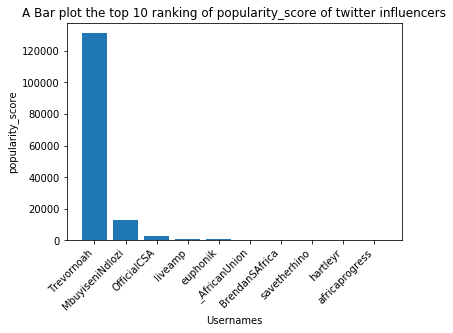

In [70]:
plt.bar(popularity_ranks.head(10)["username"], popularity_ranks.head(10)["popularity score"])
plt.title("A Bar plot the top 10 ranking of popularity_score of twitter influencers")
plt.xlabel("Usernames")
plt.ylabel("popularity_score")
plt.xticks(rotation=45, ha='right')
plt.show;



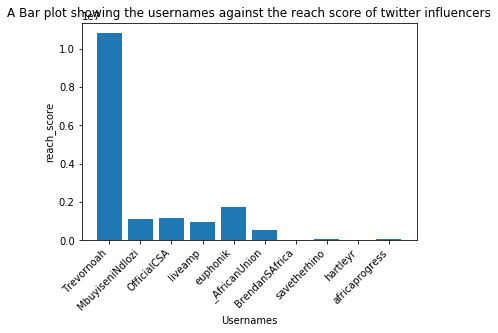

In [82]:
plt.bar(popularity_ranks.head(10)["username"], popularity_ranks.head(10)["reach score"])
plt.title("A Bar plot showing the usernames against the reach score of twitter influencers")
plt.xlabel("Usernames")
plt.ylabel("reach_score")
plt.xticks(rotation=45, ha='right')
plt.show;

In [72]:
targets_gov = pd.DataFrame()

for target in df_gov:
    try:
        
#         print("Getting data for " + target)
        tweets = api.user_timeline(screen_name=target,count=5,include_rts=False)
        user_details = api.get_user(target)
        tweet_list = [tweet for tweet in tweets]
        counter = 0
        favcounter= 0
        #initializing dataframe to store the data
        #targets = pd.DataFrame(columns=['username','popularity score','reach score','relevance score'])
        
        for tweet in tweet_list:
            retweetcount = tweet.retweet_count
            favorite = tweet.favorite_count
            counter += retweetcount
            favcounter += favorite
#             print(tweet.text)
#             print('number of retweets ' , retweetcount)
#             print('number of likes ' , favorite)
            popularity_score = counter + favcounter   
            
            
            
        followers_count = user_details.followers_count
        friends_count = user_details.friends_count
#         print('number of followers ',followers_count )
#         print('number of people',target,'follows', friends_count)
#         print('popularity score',popularity_score)
        reachscore = followers_count + friends_count
#         print('reach score ', reachscore)
        data = pd.DataFrame(data=[target], columns=['username'])
        data['popularity score'] = np.array([popularity_score])
        data['reach score'] = np.array([reachscore])
        data['number of followers'] = np.array([followers_count])
        data['number of friends'] = np.array([friends_count])
        
        targets_gov=pd.concat([targets_gov,data],ignore_index = True)
        
        #targets.append({'username':target, 'popularity score': popularity_score,'reach score':reachscore,'relevance score' : '0'},ignore_index = True)
        
    except tweepy.TweepError :
        pass


targets_gov.head()

""
